In [11]:
### 24 April 2025
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

-------------------x--------------


array([[270318,  51379,  29335],
       [266207,  49792,  27462],
       [241061,  36267,  22892],
       [285092,  37801,  21107],
       [279149,  42968,  20987],
       [272802,  37017,  20833],
       [110648,  39088,  22442],
       [118215,  45341,  22271],
       [246790,  32958,  11519],
       [274843,  42771,  17922]])

array([[ 0.54166122,  1.72669865,  1.65804268],
       [ 0.47579119,  1.44823848,  1.25251723],
       [ 0.07288004, -0.92490183,  0.26306109],
       [ 0.77838314, -0.65574122, -0.12341138],
       [ 0.68315921,  0.25087734, -0.14939272],
       [ 0.58146204, -0.7933044 , -0.18273544],
       [-2.01671086, -0.42992003,  0.16563106],
       [-1.89546578,  0.66725161,  0.12860765],
       [ 0.16467507, -1.50550969, -2.19932065],
       [ 0.61416472,  0.21631108, -0.81299951]])

KMeans(n_clusters=1, n_init=10, random_state=42)

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method for Optimal k')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Inertia')

([<matplotlib.axis.XTick at 0x7eda2333bad0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

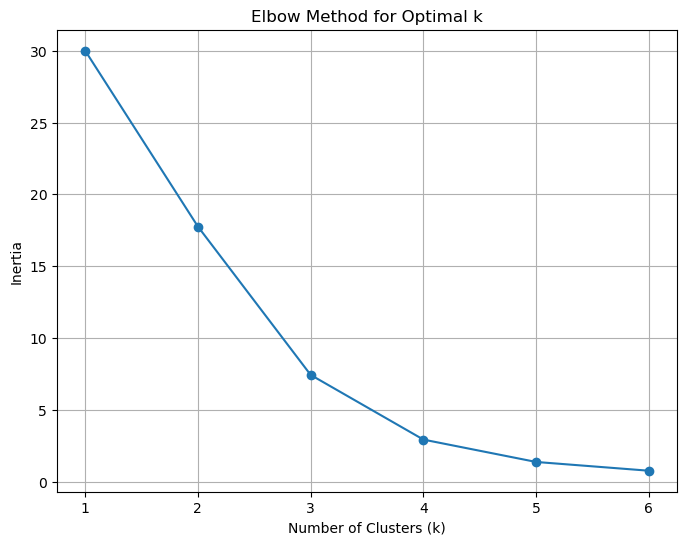

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Score for Optimal k')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Score')

([<matplotlib.axis.XTick at 0x7eda23611700>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

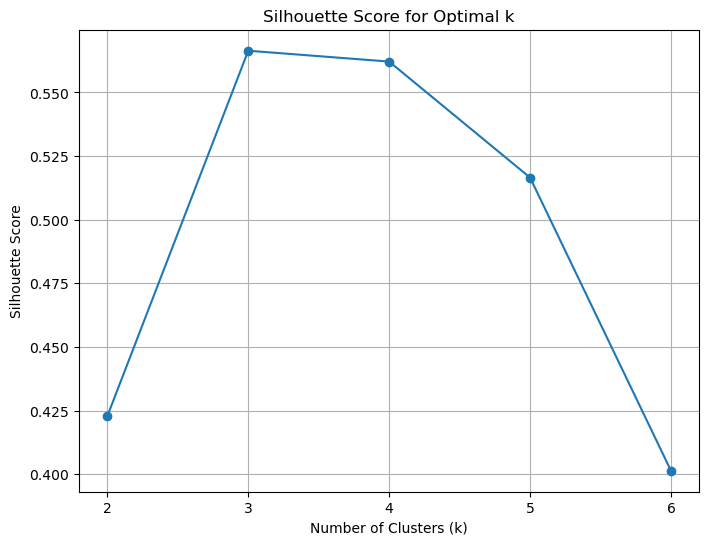

###############################################
###############################################
############################################### df['Cluster'] ##################################
Category
2014    2
2015    2
2016    0
2017    0
2018    0
2019    0
2020    1
2021    1
2022    0
2023    0
Name: Cluster, dtype: int32

Years in each cluster:
Category
2016    0
2017    0
2018    0
2019    0
2022    0
2023    0
2020    1
2021    1
2014    2
2015    2
Name: Cluster, dtype: int32

Average flight hours per category for each cluster:
         Commercial air transport  General aviation  Sport aviation
Cluster                                                            
0                   266622.833333           38297.0         19210.0
1                   114431.500000           42214.5         22356.5
2                   268262.500000           50585.5         28398.5


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Clusters based on Commercial Air Transport over Years')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Commercial Air Transport Hours')

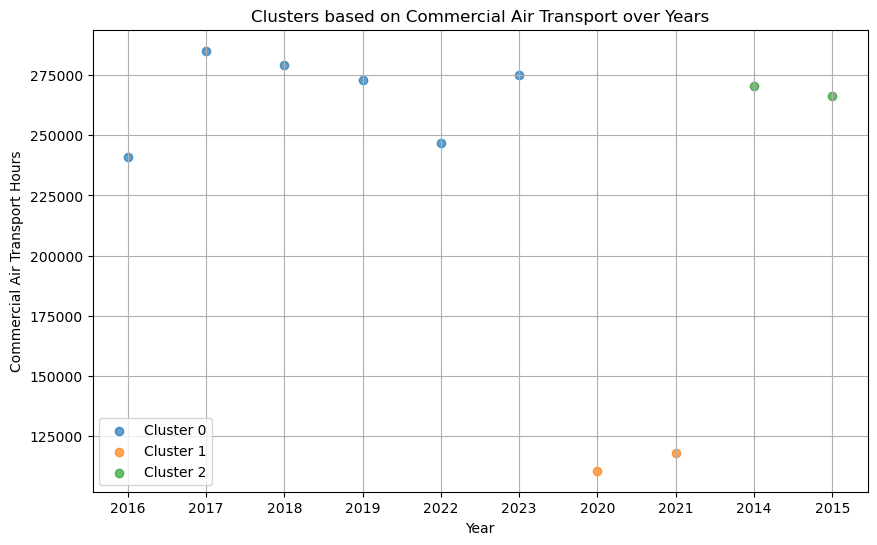

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# 1. Load the data (replace with your actual loading method if needed)
data = {'Category': ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
        'Commercial air transport': [270318, 266207, 241061, 285092, 279149, 272802, 110648, 118215, 246790, 274843],
        'General aviation': [51379, 49792, 36267, 37801, 42968, 37017, 39088, 45341, 32958, 42771],
        'Sport aviation': [29335, 27462, 22892, 21107, 20987, 20833, 22442, 22271, 11519, 17922]}
df = pd.DataFrame(data)
df = df.set_index('Category') # Set 'Year' as index

# 2. Prepare the data for clustering
X = df.values # Get the flight hour values as a NumPy array



print('-------------------x--------------')
X
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled
# 3. Determine the optimal number of clusters (k) using the Elbow Method
inertia = []
possible_k_values = range(1, 7)
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(possible_k_values, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

# 4. Determine the optimal number of clusters (k) using Silhouette Score
silhouette_scores = []
possible_k_values_silhouette = range(2, 7)
for k in possible_k_values_silhouette:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(possible_k_values_silhouette, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(possible_k_values_silhouette)
plt.grid(True)
plt.show()
















print("###############################################")
print("###############################################")





# 5. Apply K-Means with the chosen optimal k (let's assume k=3 based on the plots)
optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['Cluster'] = kmeans_optimal.fit_predict(X_scaled)



print("############################################### df['Cluster'] ##################################")
print(df['Cluster'])


# 6. Analyze the clusters (display the years in each cluster)
print("\nYears in each cluster:")
print(df['Cluster'].sort_values())

# 7. Analyze the cluster characteristics (average flight hours per category for each cluster)
cluster_analysis = df.groupby('Cluster').mean()
print("\nAverage flight hours per category for each cluster:")
print(cluster_analysis)

# 8. Visualize the clusters (you might need more sophisticated visualization for higher dimensions)
plt.figure(figsize=(10, 6))
for cluster_num in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_num]
    plt.scatter(cluster_data.index, cluster_data['Commercial air transport'], label=f'Cluster {cluster_num}', alpha=0.7)

plt.title('Clusters based on Commercial Air Transport over Years')
plt.xlabel('Year')
plt.ylabel('Commercial Air Transport Hours')
plt.legend()
plt.grid(True)
plt.show()